In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from matplotlib.ticker import MaxNLocator, ScalarFormatter, FixedFormatter, FixedLocator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
%config InlineBackend.figure_format='retina' 

In [2]:
# code for the font from https://github.com/scentellegher/code_snippets/blob/d6e3a65b0c4e715d982466f77d94c4f8b0827b38/matplotlib_font/Matplotlib_custom_font.ipynb

from matplotlib import font_manager

font_dirs = ['font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [3]:
# import data and merge to get geometry

df = pd.read_csv('./data/county_data.csv',  dtype = {'fips' : 'str', 'rucc_grouped' : 'str', 'RUCC_2013' : 'str'})
us_shp = gpd.read_file('./data/county_shapefile.shp')

df = us_shp.merge(df, how = 'inner', on = ['GID_2', 'fips'])

df = df.to_crs("ESRI:102003")

## COMPUTE PARTISAN SEGREGATION

Net difference between exposure to Republicans and Democrats, scaled between 0 and 1.

In [1]:
# NOTE: it is commented because data is already present in the dataset provided

# df['segregation_off'] = (df['proximity_rep_coloc'] - df['proximity_dem_coloc'])
# df[['segregation_off']] = MinMaxScaler().fit_transform(df[['segregation_off']])

# df['segregation_on'] = (df['proximity_rep_sci'] - df['proximity_dem_sci'])
# df[['segregation_on']] = MinMaxScaler().fit_transform(df[['segregation_on']])

# df['segregation_res'] = (df['proximity_rep_res'] - df['proximity_dem_res'])
# df[['segregation_res']] = MinMaxScaler().fit_transform(df[['segregation_res']])

## POPULATION-WEIGHTED PARTISAN SEGREGATION

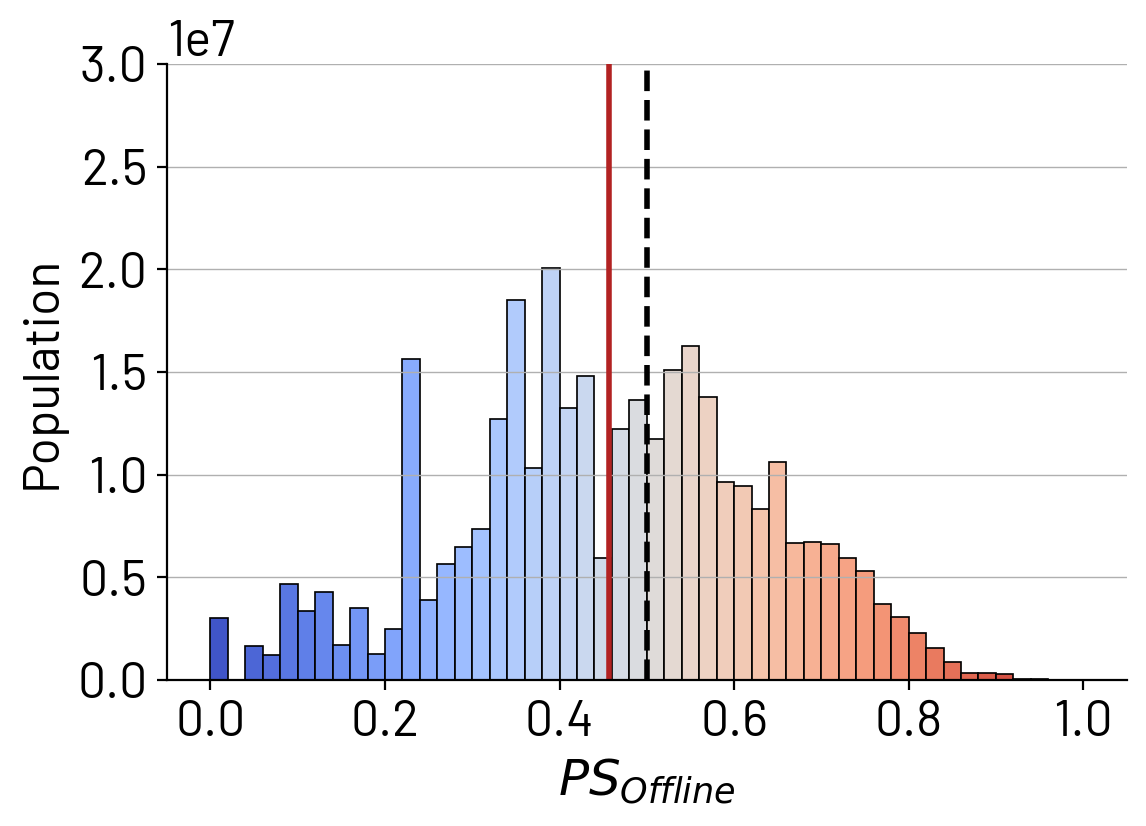

In [4]:
plt.figure(figsize=(6,4))  
cm =  sns.color_palette("coolwarm", 50)
ax = sns.histplot(df, x='segregation_off', weights='pop_size', binwidth=0.02)


for bin_,i in zip(ax.patches,cm):
    bin_.set_facecolor(i)

ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='y', which='major', labelsize=14)

fig = ax.get_figure()
fig.subplots_adjust(left=0.1)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('$PS_{Offline}$', size=18)
plt.ylabel('Population', size=18)


plt.grid(linewidth=0.5, axis='y')

plt.ylim(None, 30000000)
plt.ticklabel_format(axis="y", style="scientific")
ax.yaxis.offsetText.set_fontsize(18)
plt.axvline(np.average(df['segregation_off'], weights=df['pop_size']), c='firebrick', linewidth=2)
plt.axvline(0.5, c='black', linestyle='--', linewidth=2)

sns.despine()


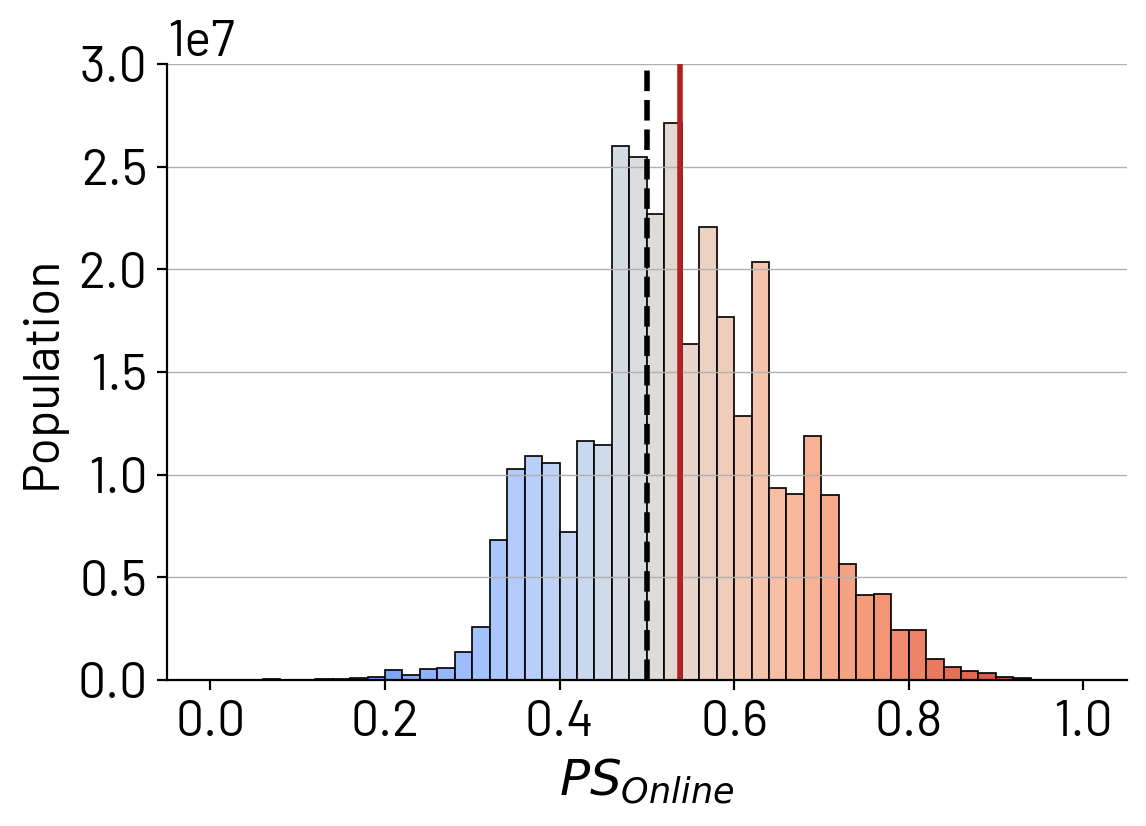

In [5]:
plt.figure(figsize=(6,4))  

cm =  sns.color_palette("coolwarm", 50)
ax = sns.histplot(df, x='segregation_on', weights='pop_size', binwidth=0.02)

for bin_,i in zip(ax.patches,cm):
    bin_.set_facecolor(i)

ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='y', which='major', labelsize=14)

fig = ax.get_figure()
fig.subplots_adjust(left=0.1)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('$PS_{Online}$', size=18)
plt.ylabel('Population', size=18)


plt.grid(linewidth=0.5, axis='y')

plt.ylim(None, 30000000)
plt.ticklabel_format(axis="y", style="scientific")
ax.yaxis.offsetText.set_fontsize(18)
plt.axvline(np.average(df['segregation_on'], weights=df['pop_size']), c='firebrick', linewidth=2)
plt.axvline(0.5, c='black', linestyle='--', linewidth=2)
sns.despine()



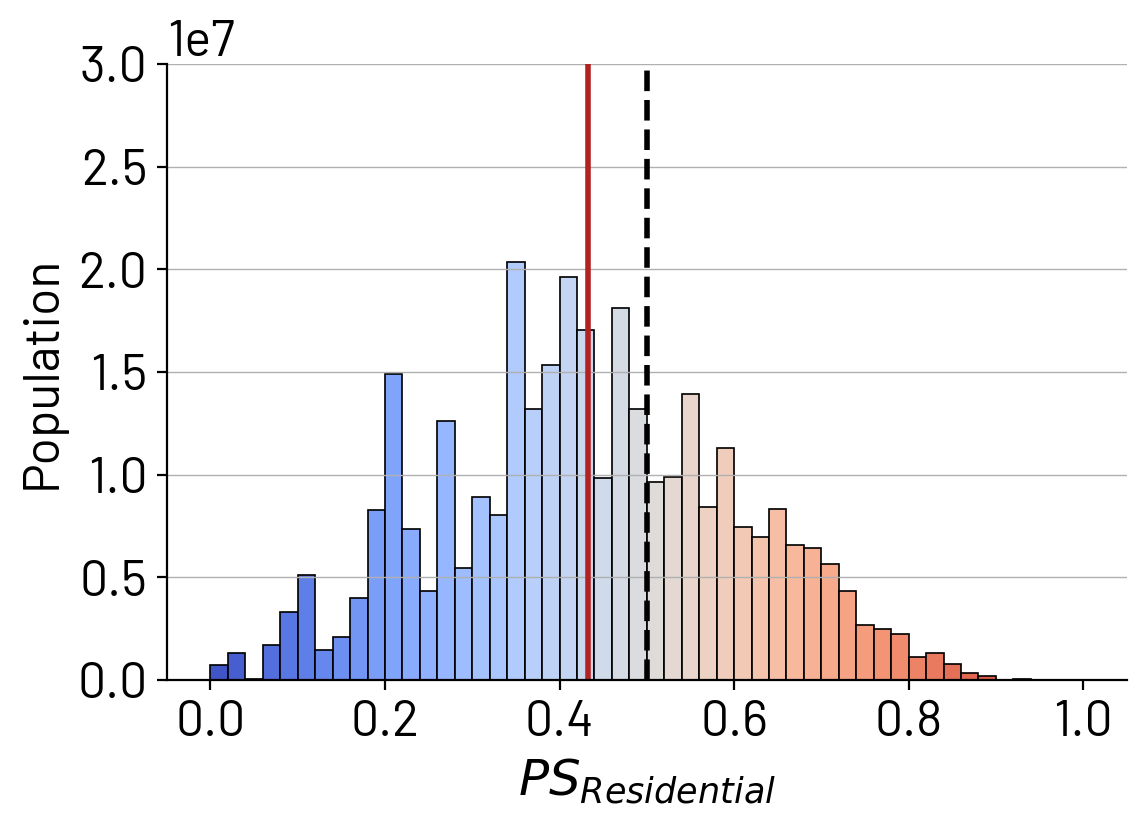

In [6]:
plt.figure(figsize=(6,4))  
cm =  sns.color_palette("coolwarm", 50)
ax = sns.histplot(df, x='segregation_res', weights='pop_size', binwidth=0.02)

for bin_,i in zip(ax.patches,cm):
    bin_.set_facecolor(i)

ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='y', which='major', labelsize=14)

fig = ax.get_figure()
fig.subplots_adjust(left=0.1)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('$PS_{Residential}$', size=18)
plt.ylabel('Population', size=18)


plt.grid(linewidth=0.5, axis='y')

plt.ylim(None, 30000000)
plt.ticklabel_format(axis="y", style="scientific")
ax.yaxis.offsetText.set_fontsize(18)
plt.axvline(np.average(df['segregation_res'], weights=df['pop_size']), c='firebrick', linewidth=2)
plt.axvline(0.5, c='black', linestyle='--', linewidth=2)

sns.despine()


## MAPS OF PARTISAN SEGREGATION

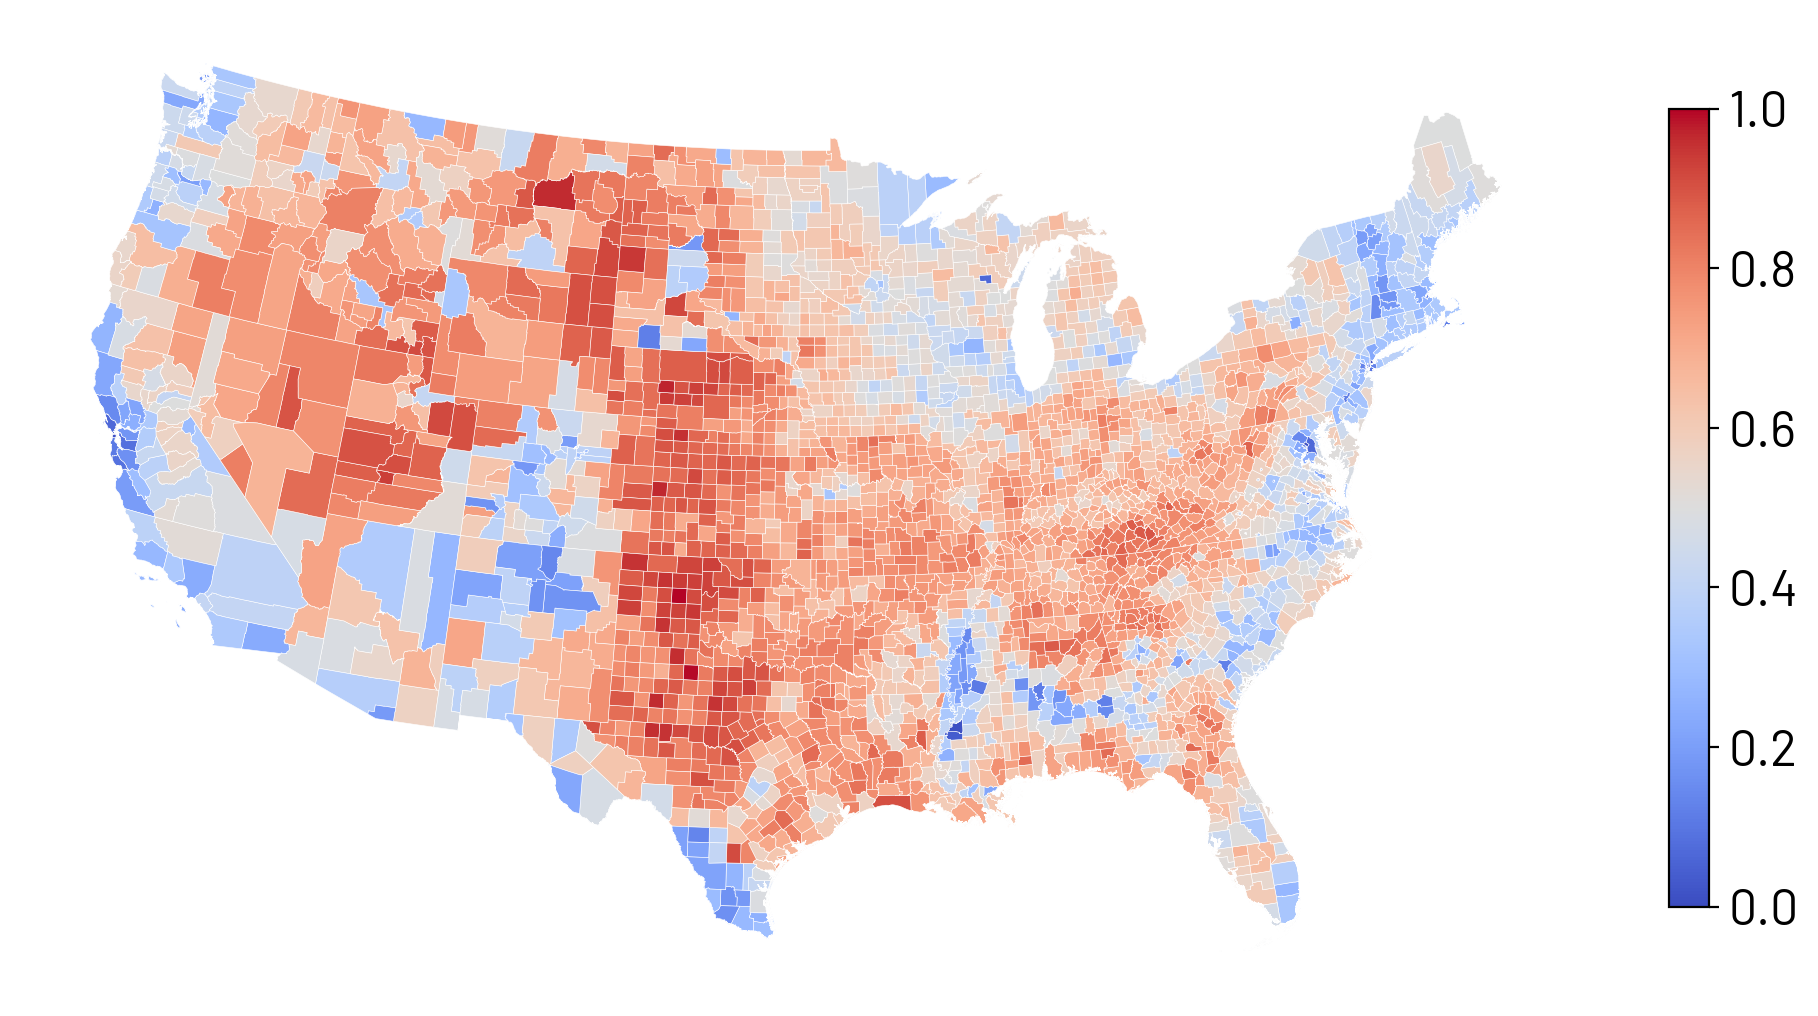

In [7]:
ax = df.plot(column='segregation_off', legend=True, 
             legend_kwds={'shrink': 0.7}, cmap='coolwarm', edgecolor='white', 
             figsize=(10,6), linewidth=0.2, vmin=0, vmax=1)

ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.tick_params(labelsize=18) 
cbar.yaxis.get_label().set_fontsize(20)

plt.tight_layout()


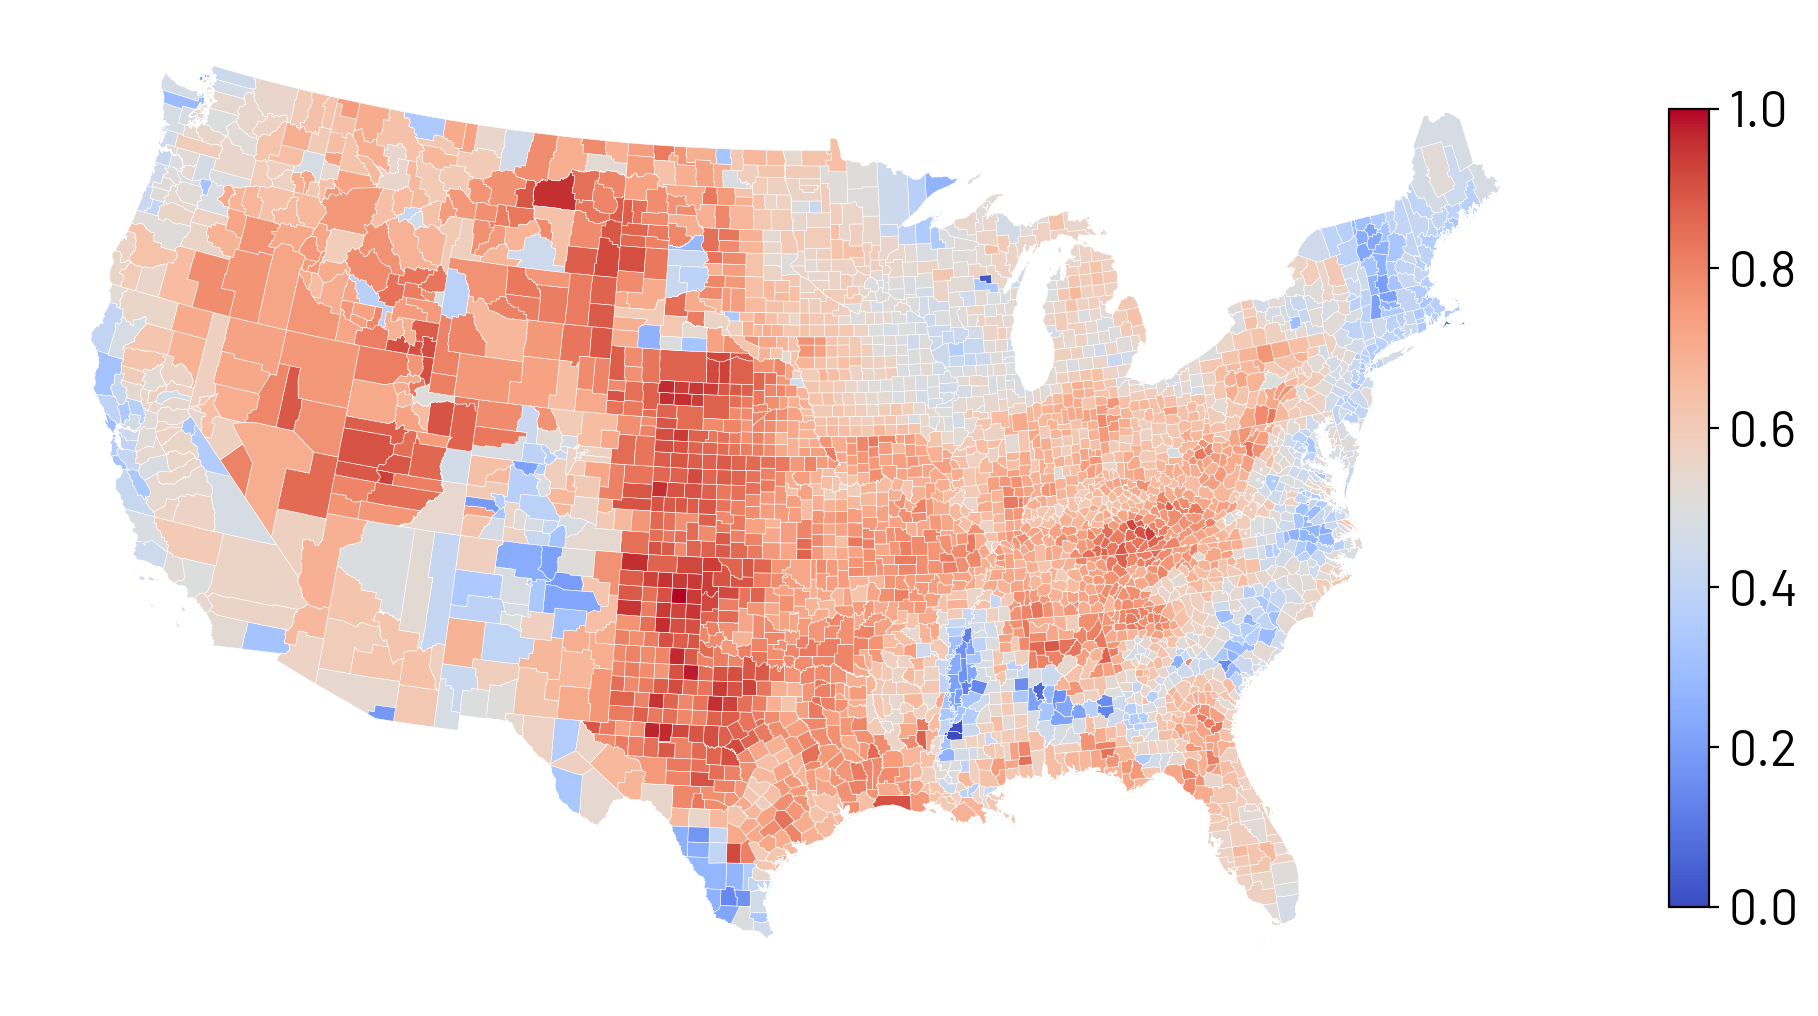

In [8]:
ax = df.plot(column='segregation_on', legend=True, 
             legend_kwds={'shrink': 0.7}, cmap='coolwarm', edgecolor='white', 
             figsize=(10,6), linewidth=0.2, vmin=0, vmax=1)


ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.tick_params(labelsize=18) 
cbar.yaxis.get_label().set_fontsize(20)

plt.tight_layout()


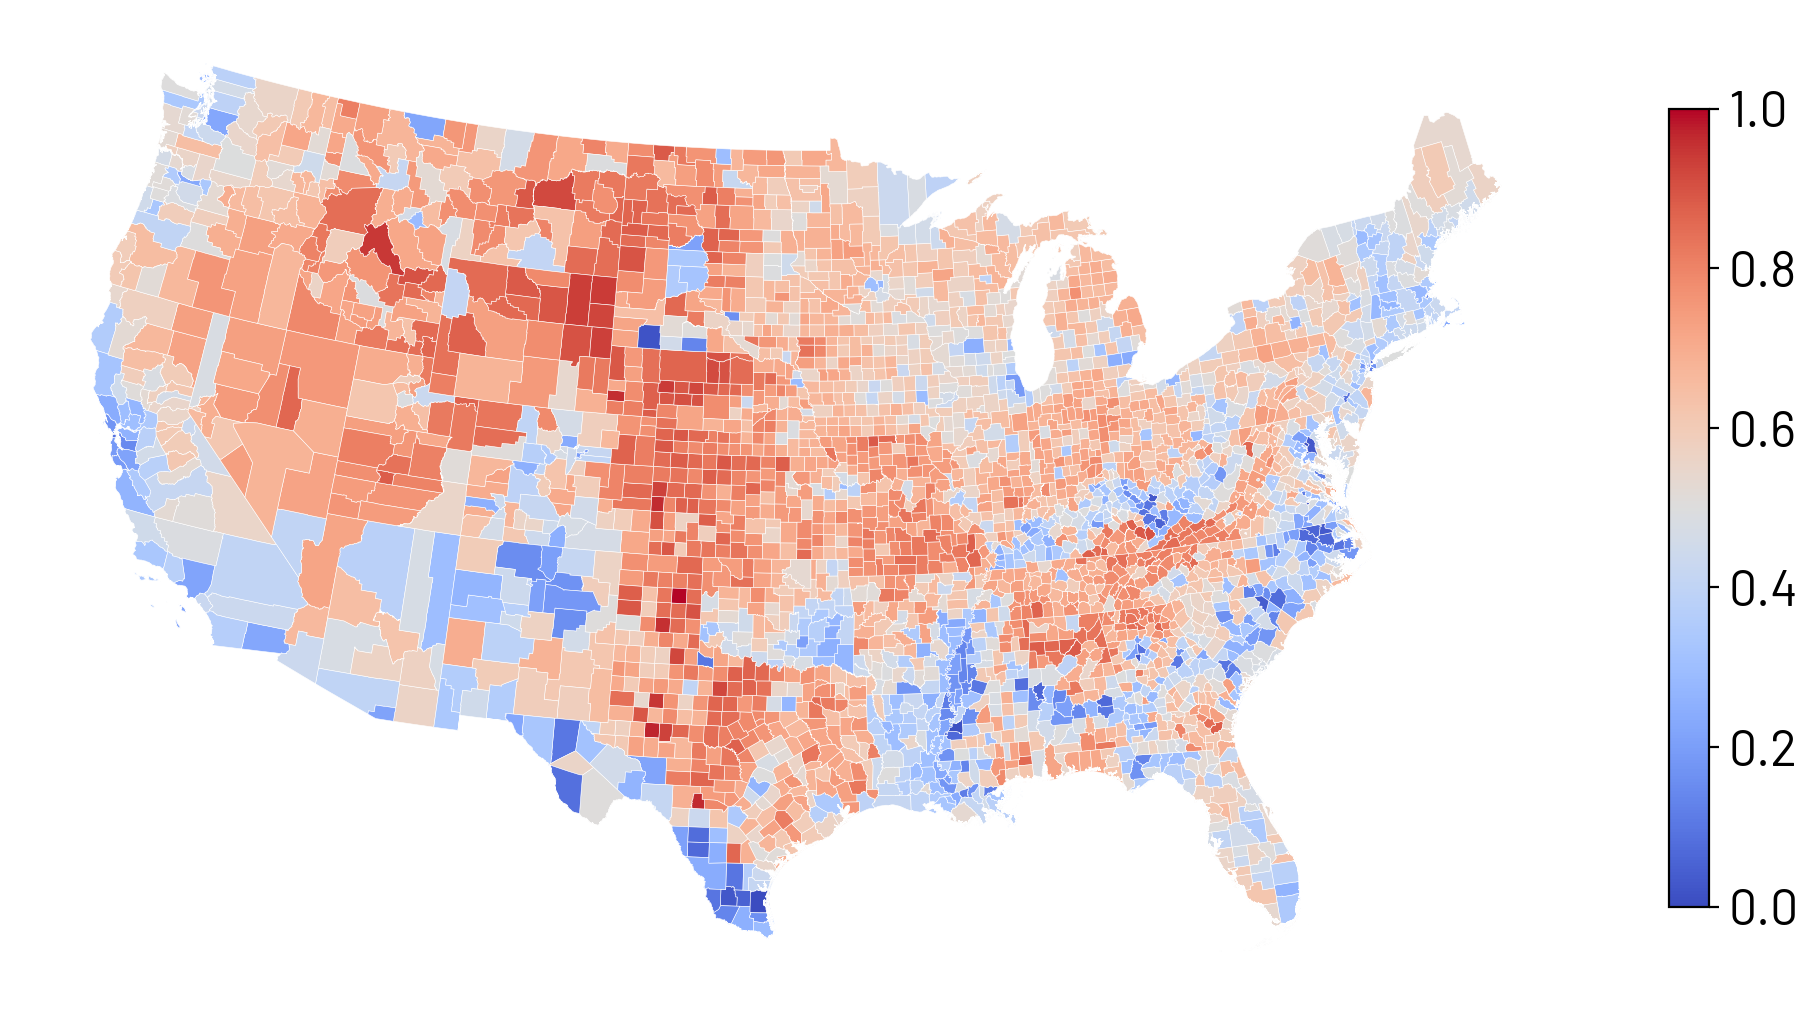

In [9]:
ax = df.plot(column='segregation_res', legend=True, 
             legend_kwds={'shrink': 0.7}, cmap='coolwarm', edgecolor='white', 
             figsize=(10,6), linewidth=0.2, vmin=0, vmax=1)


ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]  
cbar.tick_params(labelsize=18) 
cbar.yaxis.get_label().set_fontsize(20)

plt.tight_layout()

In [10]:
# t-test among partisan segregation of different dimensions

t_statistic, p_value = stats.ttest_ind(df['segregation_off'], df['segregation_on'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['segregation_off'], df['segregation_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['segregation_on'], df['segregation_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)

t-statistic: -2.274770284882998 ---- p-value: 0.022953746845913628
t-statistic: 8.254978860282264 ---- p-value: 1.8399574846244643e-16
t-statistic: 10.826757368439207 ---- p-value: 4.487548356120957e-27


## MODELING - DATA PREPARATION -- ONLY METRO AREAS

In [11]:
metro_df = df[df['rucc_grouped'] == '1']


In [12]:
# dependent and independent variables

X = metro_df[['perc_latino_hispanic', 'perc_african_american', 'perc_unemployed', 'perc_graduated', 'perc_urban_pop']] 

y_off = metro_df['segregation_off']
y_on = metro_df['segregation_on']
y_res = metro_df['segregation_res']


<AxesSubplot:>

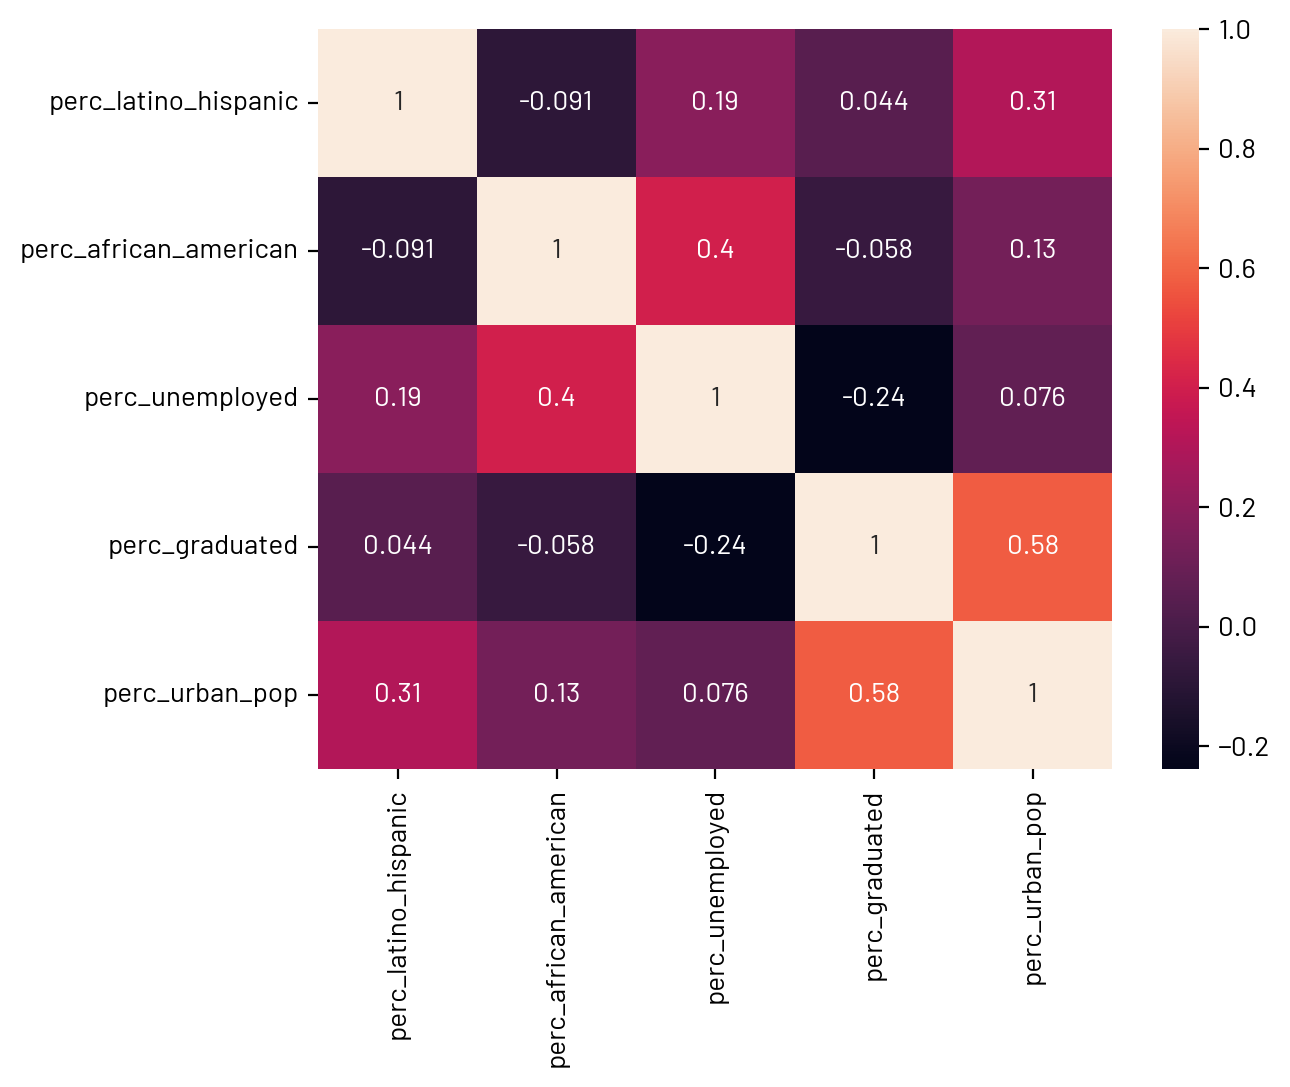

In [13]:
sns.heatmap(X.corr(), annot=True)

In [14]:
# compute VIF for multicollinearity

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_data

Feature       VIF
0   perc_latino_hispanic  2.027098
1  perc_african_american  2.124056
2        perc_unemployed  4.988887
3         perc_graduated  6.614672
4         perc_urban_pop  7.166468

## MODELS

### OFFLINE

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_off, test_size=0.3, random_state=42)

rf_off = GradientBoostingRegressor(random_state=42)

rf_off.fit(X_train, y_train)

y_pred = rf_off.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
r2 = r2_score(y_test, y_pred)

print(f'{rf_off} -- Mean Squared Error: {mse} -- r2: {r2}')

GradientBoostingRegressor(random_state=42) -- Mean Squared Error: 0.009819317117324115 -- r2: 0.6328288742311485


In [16]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

top = cm.get_cmap('BuGn_r', 128) 
bottom = cm.get_cmap('BuPu', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
red_green = ListedColormap(newcolors, name='OrangeBlue')


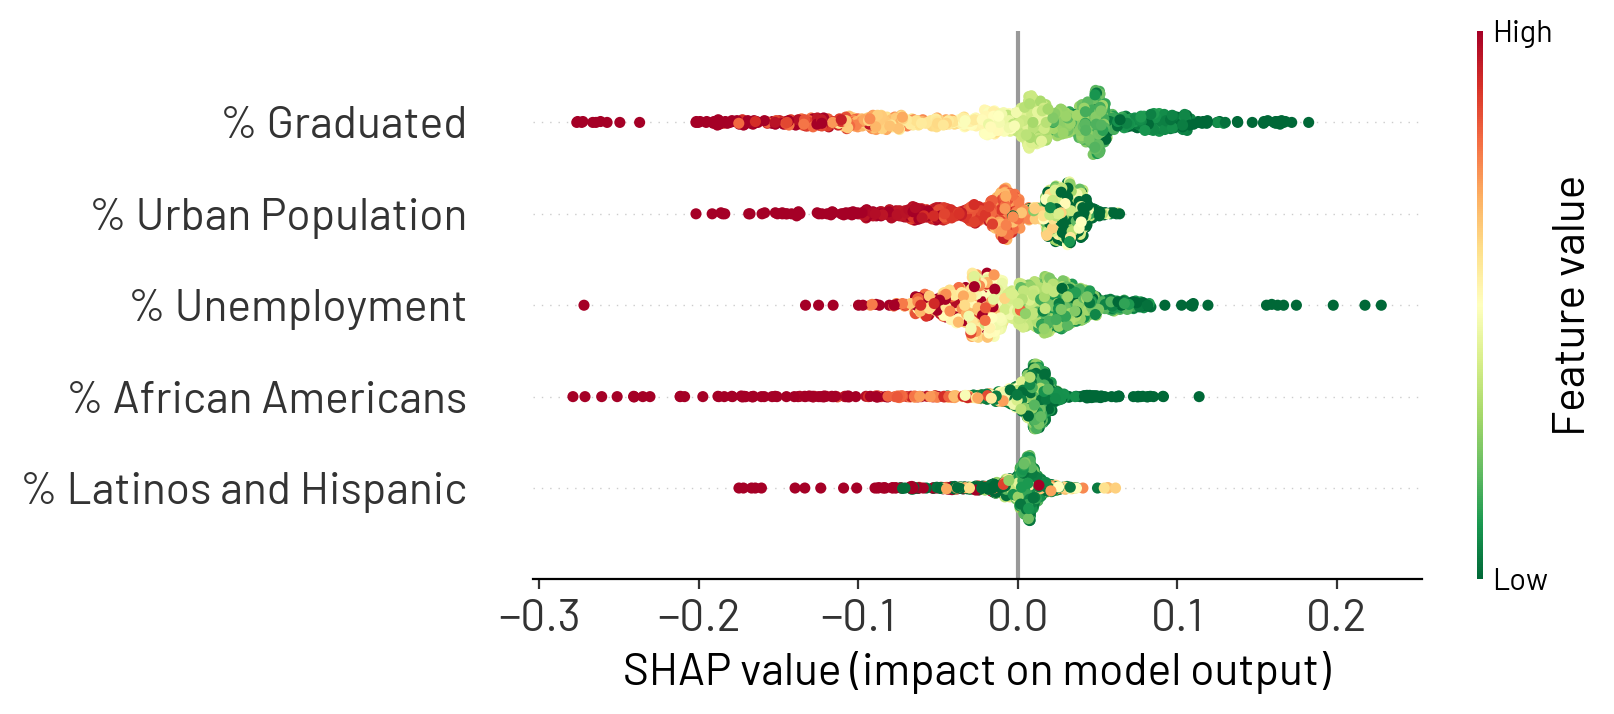

In [17]:
import shap
shap.initjs()

explainer_off = shap.TreeExplainer(rf_off, X)

shap_values_offline = explainer_off.shap_values(X)

shap.summary_plot(shap_values_offline, X, feature_names=['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], cmap = 'RdYlGn_r', color_bar=False , show=False)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('SHAP value (impact on model output)',fontsize=16)

m = cm.ScalarMappable(cmap='RdYlGn_r')
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=100)
cb.set_ticklabels(["Low", "High"],fontsize=16)
cb.set_label("Feature value", fontsize=16, labelpad=0)
cb.ax.tick_params(labelsize=11, length=0)
cb.set_alpha(1)
cb.outline.set_visible(False)

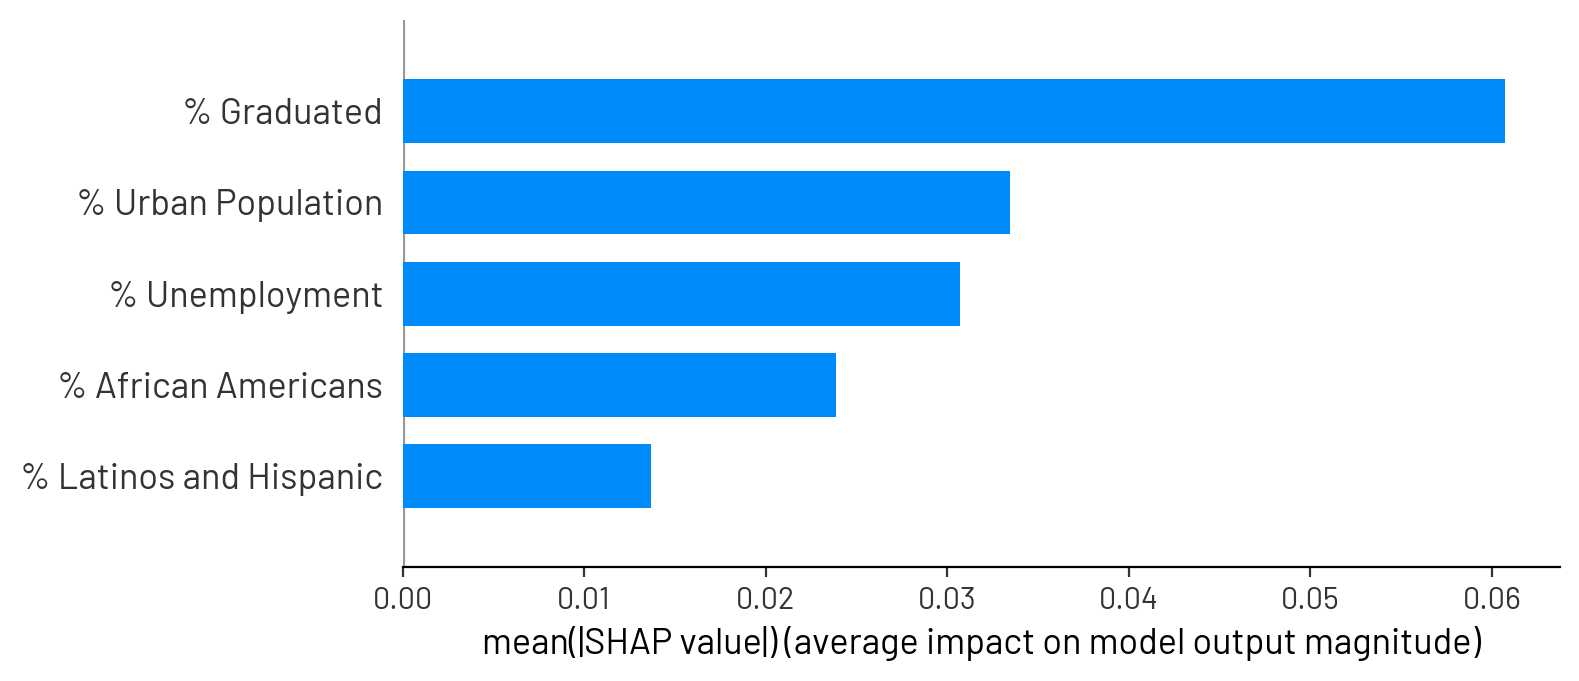

In [18]:
shap.summary_plot(shap_values_offline, X, feature_names=['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], plot_type = 'bar', show=False)


In [19]:
vals = np.abs(shap_values_offline).mean(0)

shap_importance = pd.DataFrame(list(zip(['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
3             % Graduated                 0.060707
4      % Urban Population                 0.033483
2          % Unemployment                 0.030694
1     % African Americans                 0.023864
0  % Latinos and Hispanic                 0.013657

### ONLINE

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_on, test_size=0.3, random_state=42)

rf_on = GradientBoostingRegressor(random_state=42)

rf_on.fit(X_train, y_train)

y_pred = rf_on.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
r2 = r2_score(y_test, y_pred)

print(f'{rf_on} -- Mean Squared Error: {mse} -- r2: {r2}')

GradientBoostingRegressor(random_state=42) -- Mean Squared Error: 0.007413522295226345 -- r2: 0.5534195894702132


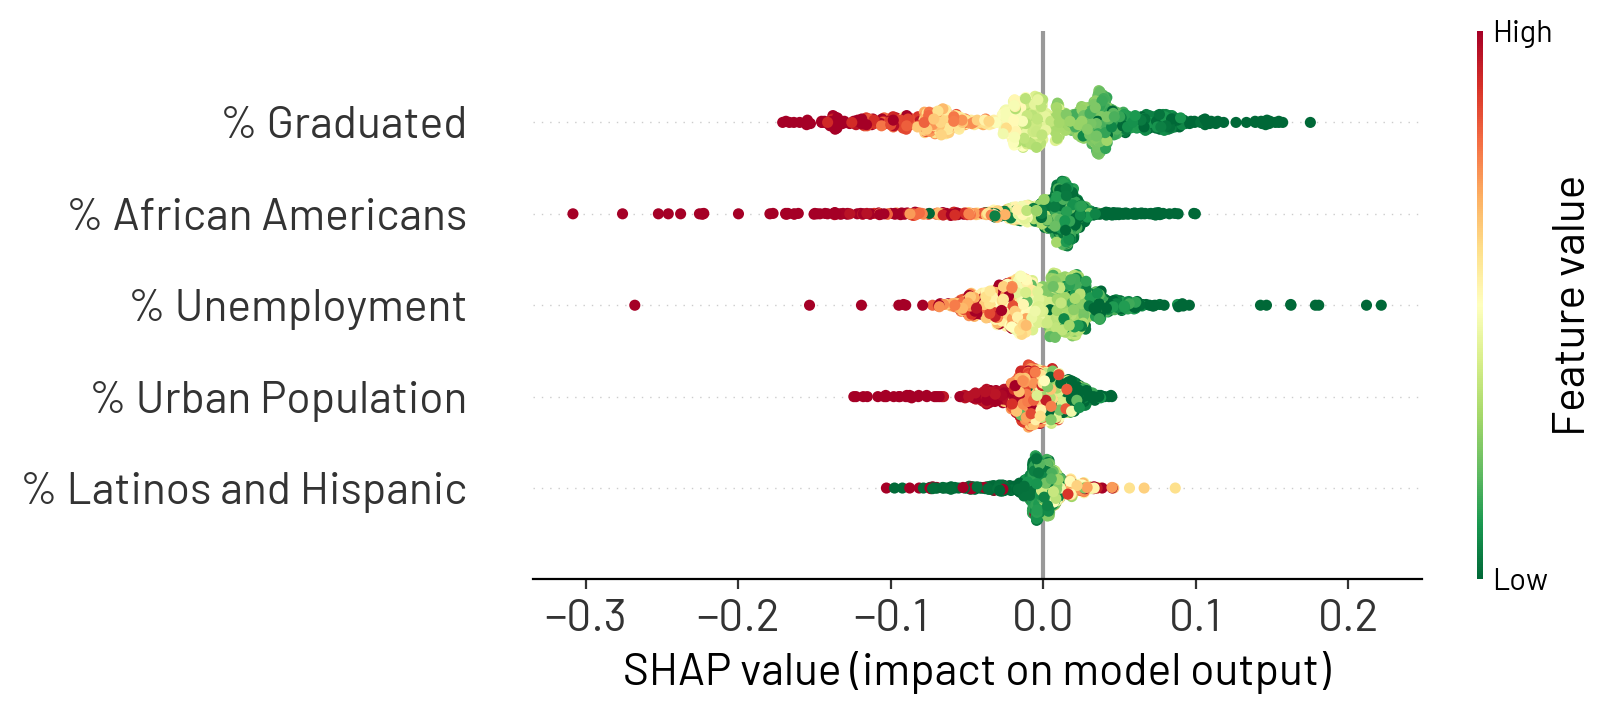

In [21]:
import shap
shap.initjs()

explainer_on = shap.TreeExplainer(rf_on, X)

shap_values_online = explainer_on.shap_values(X)

shap.summary_plot(shap_values_online, X, feature_names=['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], cmap = "RdYlGn_r", color_bar=False , show=False)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('SHAP value (impact on model output)',fontsize=16)

m = cm.ScalarMappable(cmap='RdYlGn_r')
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=100)
cb.set_ticklabels(["Low", "High"],fontsize=16)
cb.set_label("Feature value", fontsize=16, labelpad=0)
cb.ax.tick_params(labelsize=11, length=0)
cb.set_alpha(1)
cb.outline.set_visible(False)

In [22]:
vals = np.abs(shap_values_online).mean(0)

shap_importance = pd.DataFrame(list(zip(['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
3             % Graduated                 0.047996
1     % African Americans                 0.026404
2          % Unemployment                 0.024995
4      % Urban Population                 0.015830
0  % Latinos and Hispanic                 0.011835

### RESIDENTIAL

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.3, random_state=42)

rf_res = GradientBoostingRegressor(random_state=42)

rf_res.fit(X_train, y_train)

y_pred = rf_res.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
r2 = r2_score(y_test, y_pred)

print(f'{rf_res} -- Mean Squared Error: {mse} -- r2: {r2}')

GradientBoostingRegressor(random_state=42) -- Mean Squared Error: 0.00988413261200869 -- r2: 0.6427330730065164


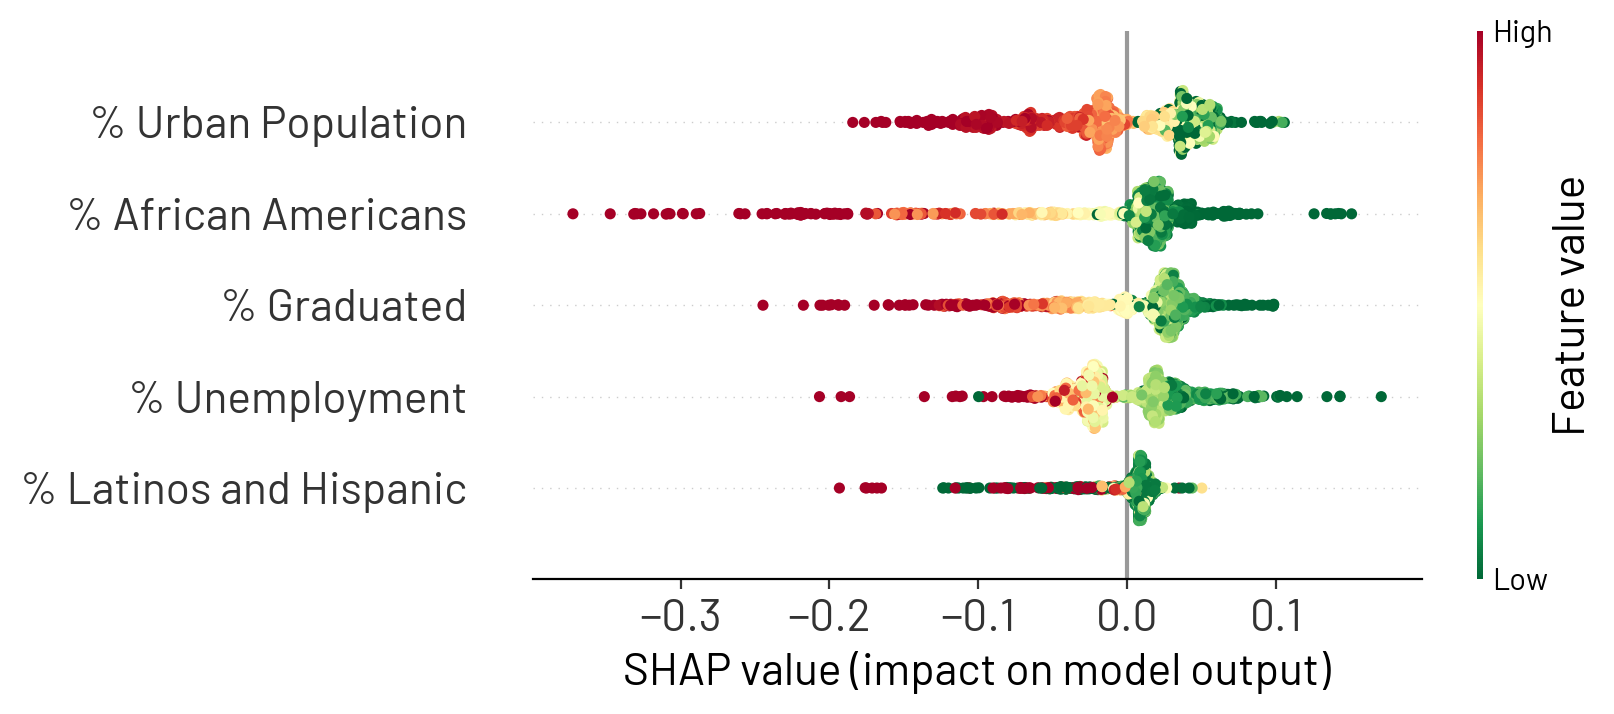

In [24]:
import shap
shap.initjs()

explainer_res = shap.TreeExplainer(rf_res, X)

shap_values_res = explainer_res.shap_values(X)

shap.summary_plot(shap_values_res, X, feature_names=['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], cmap = "RdYlGn_r", color_bar=False , show=False)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('SHAP value (impact on model output)',fontsize=16)

m = cm.ScalarMappable(cmap='RdYlGn_r')
m.set_array([0, 1])
cb = plt.colorbar(m,ticks=[0, 1], aspect=100)
cb.set_ticklabels(["Low", "High"],fontsize=16)
cb.set_label("Feature value", fontsize=16, labelpad=0)
cb.ax.tick_params(labelsize=11, length=0)
cb.set_alpha(1)
cb.outline.set_visible(False)

In [25]:
vals = np.abs(shap_values_res).mean(0)

shap_importance = pd.DataFrame(list(zip(['% Latinos and Hispanic', '% African Americans', '% Unemployment', '% Graduated', '% Urban Population'], vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
4      % Urban Population                 0.044980
1     % African Americans                 0.041858
3             % Graduated                 0.037569
2          % Unemployment                 0.031857
0  % Latinos and Hispanic                 0.015992